In [133]:
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools import visualization

### Modeling the circuit

In [134]:
def equal(circuit, q, s, a, f):
    circuit.ccx(q[0], s[0], a[0])
    circuit.ccx(q[1], s[1], a[1])
    circuit.x(q[0])
    circuit.x(s[0])
    circuit.x(q[1])
    circuit.x(s[1])
    circuit.ccx(q[0], s[0], a[0])
    circuit.ccx(q[1], s[1], a[1])
    circuit.x(q[0])
    circuit.x(s[0])
    circuit.x(q[1])
    circuit.x(s[1])
    circuit.ccx(a[0], a[1], f[0])

### Function to input all possible states of *q and s* in the circuit through the Hadamard gate

In [135]:
def input_state(circuit, q, s):
    for j in range(2):
        circuit.h(q[j])
        circuit.h(s[j])

### Creates the qubits

In [136]:
q = QuantumRegister(2, 'q')
s = QuantumRegister(2, 's')
aux = QuantumRegister(2, 'a')
f = QuantumRegister(1, 'f')
ans = ClassicalRegister(5, 'out')

### Creating the circuit

In [137]:
tutorial = QuantumCircuit()
tutorial.add_register(q)
tutorial.add_register(s)
tutorial.add_register(aux)
tutorial.add_register(f)
tutorial.add_register(ans)
input_state(tutorial, q, s)
equal(tutorial, q, s, aux, f)

for i in range(2):
    tutorial.measure(q[i], ans[i])
    tutorial.measure(s[i], ans[i+2])
tutorial.measure(f[0], ans[4])

tutorial.draw()

### First, let's try on a local simulated machine

In [138]:
backend = Aer.get_backend('qasm_simulator')

In [139]:
job = execute(tutorial, backend=backend, shots=1000)

{'10101': 68, '00110': 66, '00011': 76, '01101': 66, '00001': 53, '00100': 53, '01011': 69, '00010': 64, '01001': 53, '01000': 65, '11010': 61, '01110': 55, '11111': 58, '01100': 58, '00111': 65, '10000': 70}


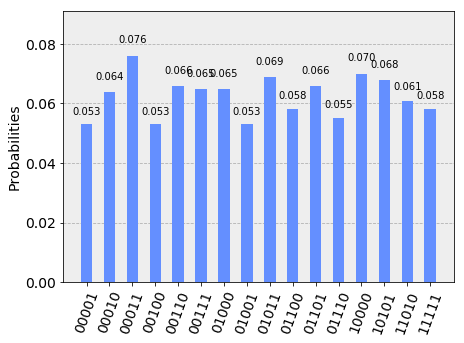

In [140]:
result = job.result()
counts = result.get_counts(tutorial)
print(counts)
visualization.plot_histogram(counts)

As we can see these results are not okay

### Now let's try with a real quantum machine

In [144]:
IBMQ.load_accounts()
from qiskit.providers.ibmq import least_busy
backend = least_busy(IBMQ.backends())
print("Backend is " + backend.name())
job = execute(tutorial, backend=backend, shots=2000)

Backend is ibmq_20_tokyo


{'10101': 66, '11011': 56, '00110': 88, '10100': 68, '11000': 34, '11110': 94, '10010': 48, '00101': 53, '01011': 57, '00100': 54, '00000': 31, '01111': 100, '11001': 47, '11010': 46, '10011': 59, '11101': 66, '11111': 95, '11100': 84, '10000': 37, '00011': 58, '01101': 61, '00001': 49, '00010': 43, '01001': 51, '01000': 37, '01110': 97, '10111': 102, '01100': 56, '01010': 47, '00111': 88, '10110': 90, '10001': 38}


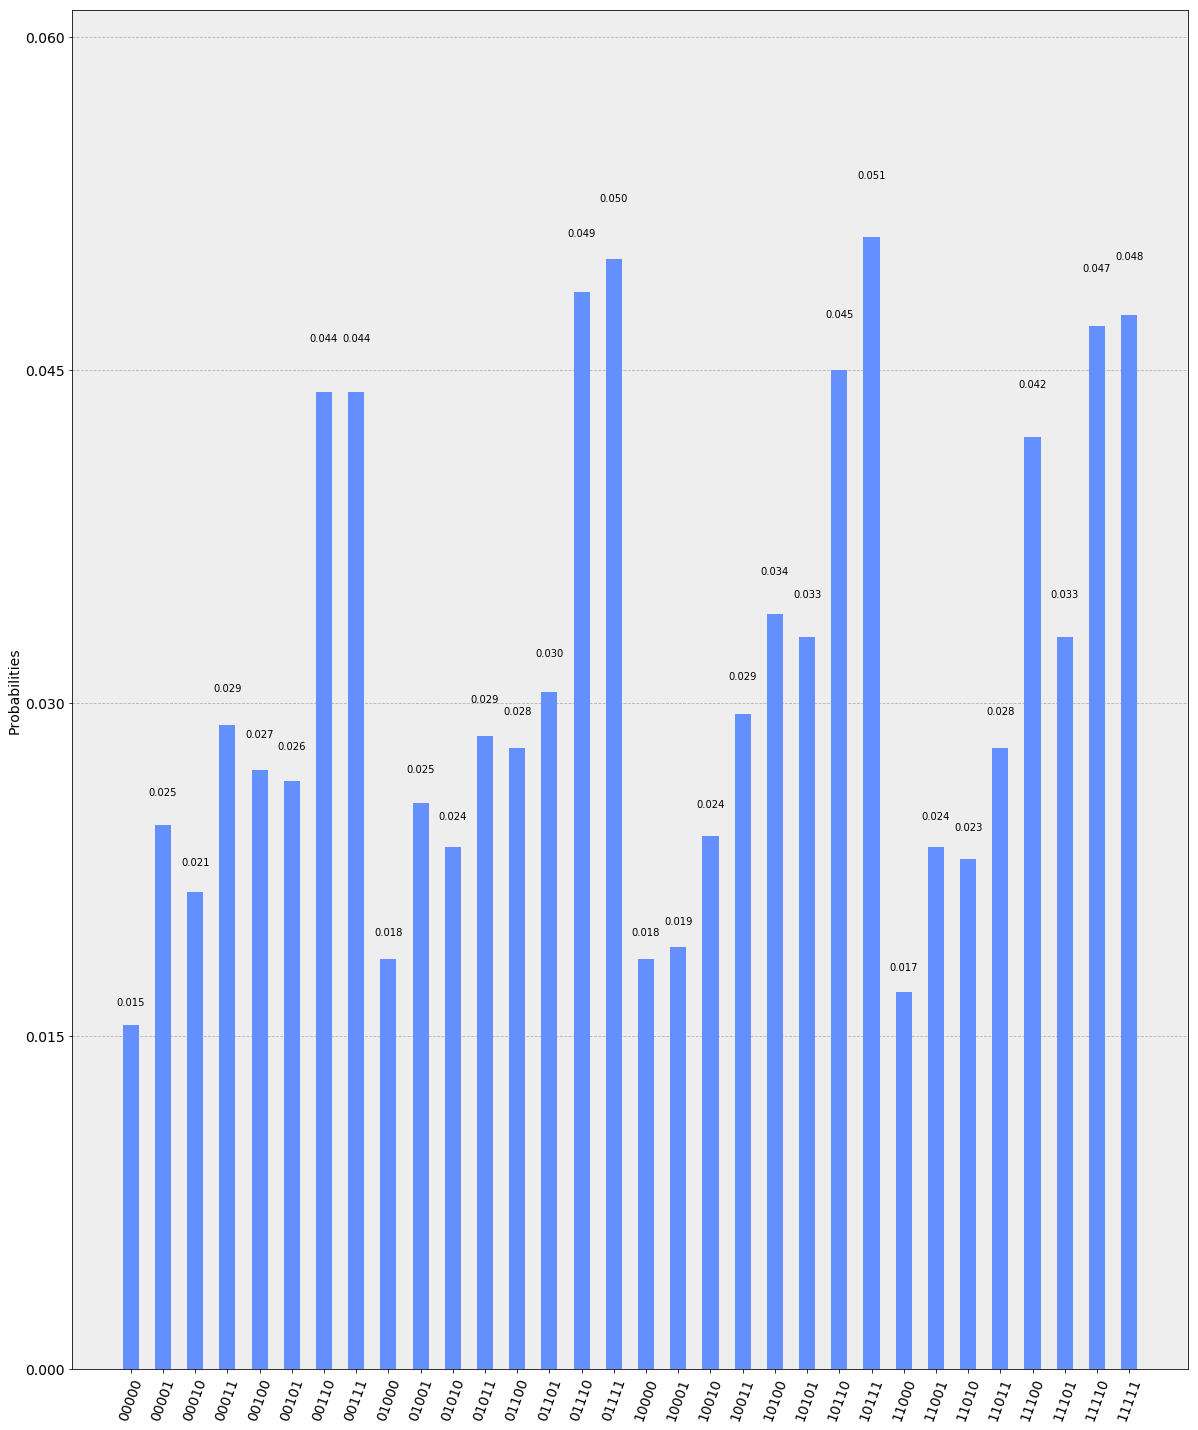

In [145]:
result = job.result()
counts = result.get_counts(tutorial)
print(counts)
visualization.plot_histogram(counts, figsize = (20,25))